# Visualisierung
Das menschliche Gehirn ist hervorragend darin, Muster in visuellen Darstellungen von Daten zu erkennen; daher werden wir in diesem Abschnitt lernen, wie man Daten mit `pandas` sowie den Bibliotheken `matplotlib` und `seaborn` für zusätzliche Funktionen visualisiert. Wir werden eine Vielzahl von Visualisierungen erstellen, die uns helfen werden, unsere Daten besser zu verstehen

## Warum ist Datenvisualisierung notwendig?

Bisher haben wir uns stark darauf konzentriert, die Daten mithilfe von Statistiken zusammenzufassen. Allerdings reichen zusammenfassende Statistiken nicht aus, um die Verteilung zu verstehen – es gibt viele mögliche Verteilungen für einen gegebenen Satz von zusammenfassenden Statistiken. Datenvisualisierung ist notwendig, um die Verteilung wirklich zu verstehen (GIF funktioniert nur in Google Colab)

<div style="text-align: center; margin-top: -10px;">
<img width="50%" src="https://raw.githubusercontent.com/stefmolin/data-morph/main/docs/_static/panda-to-star-eased.gif" alt="Data Morph: panda to star" style="min-width: 300px; margin-bottom: -10px;"/>
<div style="margin: auto 26%;"><small><em>A set of points forming a panda can also form a star without any significant changes to the summary statistics displayed above. (source: <a href="https://stefaniemolin.com/data-morph/stable/index.html">Data Morph</a>)</em></small></div>
</div>


## Vorbereitung - Daten einlesen und verstehen
Wir nutzen Kaggle's [Olympics Datensatz](https://www.kaggle.com/datasets/bhanupratapbiswas/olympic-data/data)

**Lese die Daten in ein `dataframe` ein**

In [ ]:
# Dein Code hier

**Mache dich mit dem Datensatz vertraut. Welche Spalten gibt es, welche Datentypen? Was bedeutet eine Zeile? Welchen Zeitraum deckt der Datensatz ab?**

In [ ]:
# Dein Code hier

## Visualisieren mit Pandas
Der schnellste Weg zu einer Visualisierung ist es, `pandas` direkt dafür zu nutzen. Damit kann man eine Charts in einer einzigen Zeile code generieren.

Später werden wir komplexere Darstellungen mit Hilfe von `matplotlib` und `seaborn` (zwei weiteren Packages) umsetzen.

Diese vier häufigsten Visualisierungen lernen wir:
- Histogramm
- Barchart
- Linechart
- Scatterplot

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Histogramm
Beispielsweise können wir die Verteilung des Alters über alle Olympischen Teilnehmer der Moderne visualisieren. Dafür nutzen wir ein *Histogramm*

<Axes: ylabel='Frequency'>

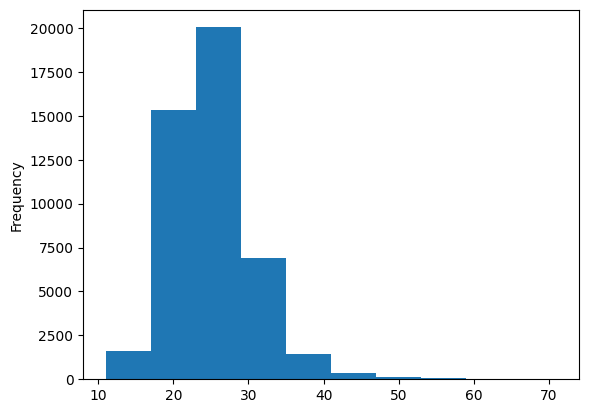

In [ ]:
df.Age.plot(kind="hist")

Diese Darstellung können wir noch ein wenig verfeinern indem wir zusätzliche Optionen (sogenannte *Argumente*) im Funktionsaufruf bestimmen. Die vielzahl möglicher Argumente können wir in der [Dokumentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) der Funktion nachlesen

<Axes: title={'center': 'Verteilung der Alters über alle Olympischen Teilnehmer 1896-2016'}, xlabel='Alter', ylabel='Anzahl'>

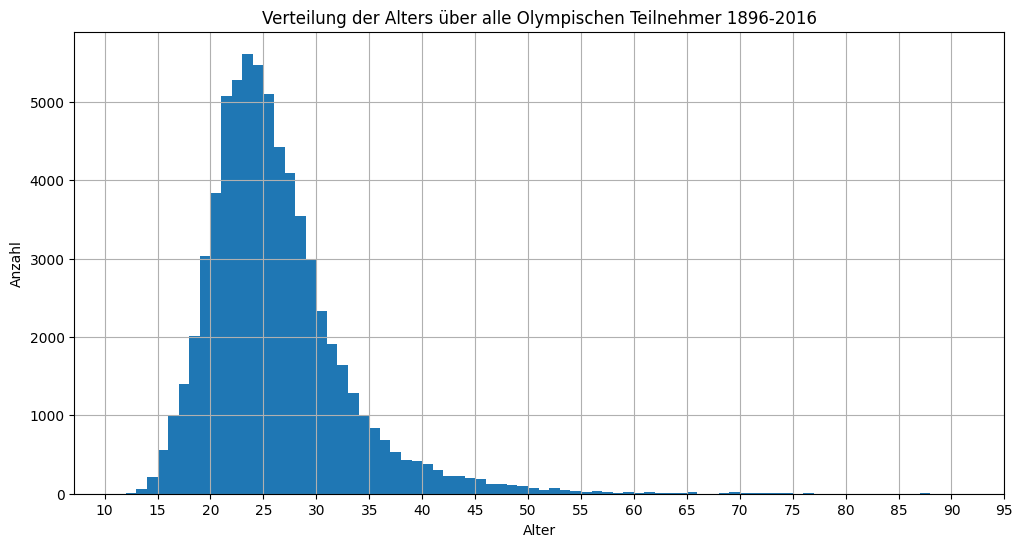

In [ ]:
df.Age.plot(
    kind="hist",
    bins=77, #int(df.Age.max() - df.Age.min()),
    grid=True,
    figsize=(12, 6),
    title="Verteilung der Alters über alle Olympischen Teilnehmer 1896-2016",
    xlabel="Alter",
    ylabel="Anzahl",
    xticks=list(range(10, 100, 5)) #list(range((int(df.Age.min())), int(df.Age.max()), 5))
    )

### Barchart
Wenn wir Häufigkeiten pro Kategorie darstellen wollen, können wir ein barchart nutzen:

<Axes: title={'center': 'Anzahl Sportler pro Sportart (1896-2016)'}, ylabel='Sport'>

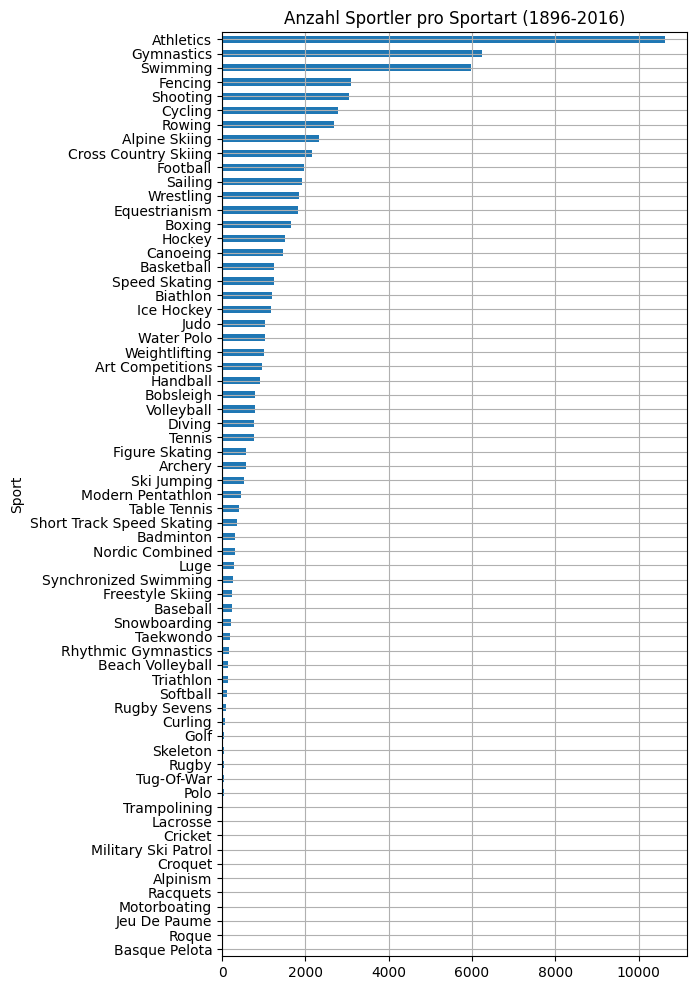

In [ ]:
df.Sport.value_counts().sort_values().plot(kind="barh", figsize=(6, 12), grid=True, title="Anzahl Sportler pro Sportart (1896-2016)")

### Line-Chart
Line-Charts werden vor allem dann verwendet, wenn eine Veränderung über Zeit dargestellt werden soll. Die x-Achse ist also meistens ein Zeitraum.

Beispielsweise können wir untersuchen ob sich die durchschnittliche Körpergröße mit der Zeit verändert hat.

**Hast du eine Vermutung?**

In [ ]:
# Diese Daten wollen wir gleich visuell darstellen
df.groupby("Year").Height.mean()

,Height
Year,
1896,181.315789
1900,176.304348
1904,176.140351
1906,176.939394
1908,176.646617
1912,176.950980
1920,176.385475
1924,175.133080
1928,176.348000


Es scheint kein starker Trend erkennbar zu sein. Das Ausschlag im ersten Jahr könnte auf Messfehler zurückzuführen sein. Sonst sind die Schwankungen marginal.

Ich hatte erwartet, dass durch den stärkeren Einbezug von weiblichen Sportlerinnen, die durchschnittliche Körpergröße sinkt. Das scheint nicht der Fall zu sein.

<Axes: title={'center': 'Durchschnittliche Körpergröße über Zeit'}, xlabel='Year'>

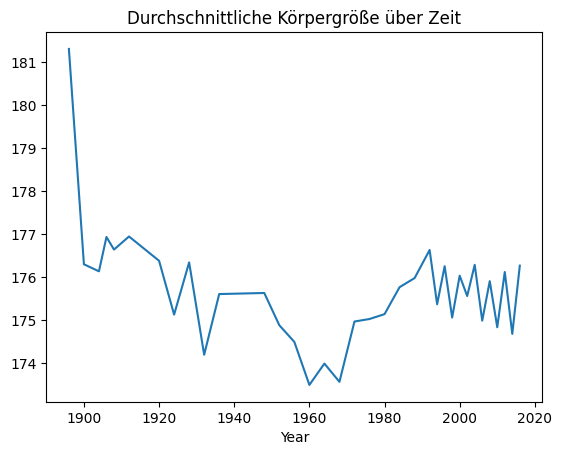

In [ ]:
df.groupby("Year").Height.mean().plot(kind="line", title="Durchschnittliche Körpergröße über Zeit")

Lass uns als nächstes schauen ob sich der Geschlechteranteil über Zeit verändert hat.

In [ ]:
# Wir speichern eine Zwischenlösung
df_gender = df.groupby("Year").Gender.value_counts(normalize=True).reset_index()
df_gender

,Year,Gender,proportion
0,1896.0,M,1.000000
1,1900.0,M,0.976923
2,1900.0,F,0.023077
3,1904.0,M,0.987730
4,1904.0,F,0.012270
...,...,...,...
64,2012.0,F,0.461660
65,2014.0,M,0.573171
66,2014.0,F,0.426829
67,2016.0,M,0.545878


Tatsächlich steigt der Anteil der Frauen auf fast 50%.

<Axes: title={'center': 'Anteil Frauen bei Olympischen Spielen (1896-2016)'}, xlabel='Year'>

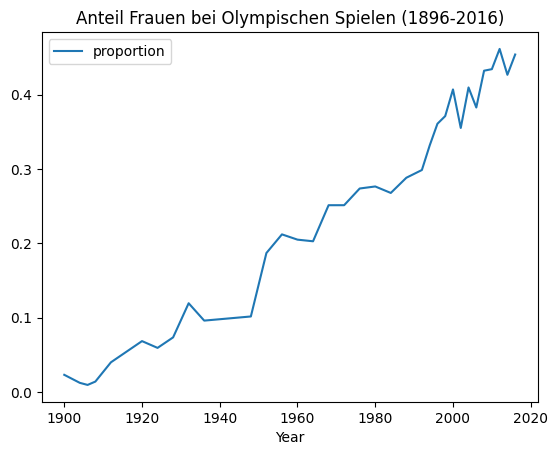

In [ ]:
# Die Zwischenlösung filtern wir bevor wir sie visualisieren
df_gender[df_gender.Gender == "F"].plot(kind="line", x="Year", y="proportion", title="Anteil Frauen bei Olympischen Spielen (1896-2016)")

Es ist also möglich, dass die Sportler zwar schon über Zeit größer geworden sind, aber dieser Effekt durch den größeren Anteil der Frauen kompensiert wird.

Um das zu untersuchen, können wir die Durchschnittliche Körpergröße pro Geschlecht über Zeit darstellen.

In [ ]:
# Wir speichern wieder eine Zwischenlösung
df_gender_height = df.groupby(["Year", "Gender"]).Height.mean().unstack(level="Gender")
df_gender_height.head(10)

Gender,F,M
Year,,
1896.0,NaN,180.250000
1900.0,NaN,175.600000
1904.0,NaN,172.400000
1906.0,NaN,177.500000
1908.0,NaN,177.258065
1912.0,NaN,177.640000
1920.0,162.000000,177.625000
1924.0,165.000000,175.933333
1928.0,167.307692,177.133333


Hier sehen wir tatsächlich einen leichten Aufwärtstrend pro Geschlecht.

<Axes: title={'center': 'Average Height per Gender over Time'}, xlabel='Year'>

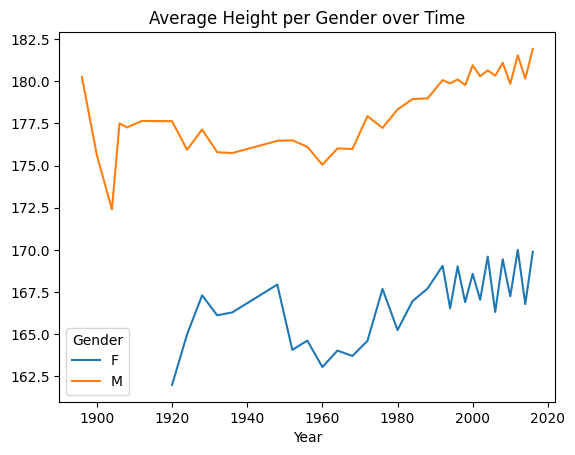

In [ ]:
df_gender_height.plot(kind="line", title="Average Height per Gender over Time")

### Scatterplot
Scatterplots sind besonders hilfreich wenn die Verteilung von zwei kontinuierlichen Variablen gleichzeitig geplottet werden soll.

In [ ]:
df.head()

,ID,Name,Gender,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


Dieser Plot hilft uns, den erwarteten Zusammenhang zwischen Kröpergröße und Gewicht nachzuvollziehen. Außerdem hilft ein Scatterplot wie dieser, Ausreißer besser zu identifizieren. Es gibt einige Sportler die aus der großen Wolke herausstechen weil sie besonders schwer sind ohne groß zu sein oder besonders groß, ohne schwer zu sein.

<Axes: xlabel='Height', ylabel='Weight'>

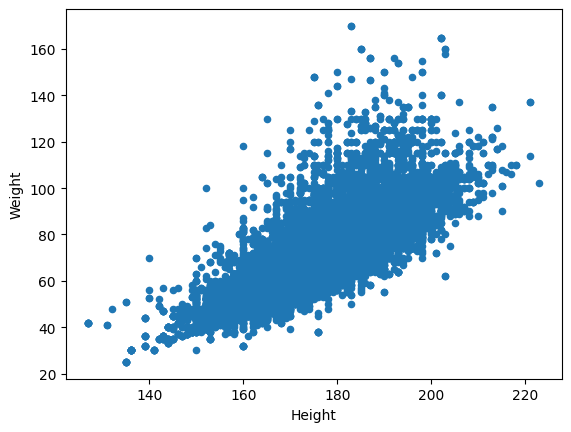

In [ ]:
df.plot(kind="scatter", x="Height", y="Weight")

## Jetzt bist du dran!
Nutze die oben gezeigten Techniken, um eigene Visualisierungen zu bauen. Beachte dabei die folgende fünf Schritte:

1) **Die richtige Frage stellen:** Jede gute Visualisierung beginnt mit einer interessanten Frage. Überlege dir, was du über den Datensatz erfahren möchtest.

2) **Die richtige Visualisierung wählen:** Unterschiedliche Visualisierungen eigenen sich für unterschiedliche Daten. Wie viele Dimensionen möchtest du darstellen? Sind deine Variablen kategorisch oder kontinuierlich? Passe die Art der Darstellung auf deine Daten an.

3) **Die Daten richtig vorbereiten:** Meistens musst du die Rohdaten erst umformen um sie effektiv darzustellen. Dazu gehört filtern und aggregieren bis die Daten die richtige Form für eine Darstellung haben.

4) **Die Visualisierung richtig umsetzen:** Die meiste Arbeit ist bereits getan. Jetzt geht es um das richtige Styling der Visualisierung, damit sie einfach lesbar ist und den Fokus auf die wichtigen Schlussfolgerungen legt.

5) **Die Visualisierung richtig interpretieren:** Was sagt deine Visualisierung aus? Beantwortet sie deine Frage? Sind die Ergebnisse überraschend? Welche anderen Darstellungen könnten die überraschende Ergebnisse erklären?  

**Versuche 3-5 interessante Fragen durch Visualisierungen zu beantworten**

In [ ]:
# Dein Code hier

In [ ]:
# Dein Code hier

In [ ]:
# Dein Code hier

In [ ]:
# Dein Code hier

In [ ]:
# Dein Code hier

## Visualisieren mit Matplotlib und Seaborn
Die `.plot()` Funktion in `pandas` ist dafür gedacht, mit wenig Code, schnell eine erste Darstellung zu erstellen. Für schönere & speziellere Visualisierungen sind `matplotlib` und `seaborn` passende Lösungen.

Solltet ihr eigenständig weiterrecherchieren werdet ihr noch auf viele weitere packages stoßen. Beliebte python packages zur Datenvisualisierung sind neben `pandas`, `matplotlib` und `seaborn` auch:
- `plotly`: Eine Bibliothek für interaktive und webbasierte Visualisierungen. Sie unterstützt 3D-Diagramme und bietet umfangreiche Anpassungsmöglichkeiten.
- `bokeh`: Ermöglicht die Erstellung interaktiver und webbasierter Visualisierungen mit hoher Leistung und Flexibilität.
- `altair`: Eine deklarative Bibliothek, die auf einfache Weise komplexe Visualisierungen erstellt, indem sie sich auf die Datenstruktur konzentriert.
- `plotnine`: Inspiriert von ggplot2 in R, bietet Plotnine eine grammatikalische Methode zur Erstellung von Grafiken in Python.

### Seaborn
Alle Visualisierungen von oben können auch in `seaborn` erreicht werden - und mehr!

[Diese Seite](https://seaborn.pydata.org/tutorial/function_overview.html) gibt einen guten ersten Einblick.

In [ ]:
# Die Konvention ist es, seaborn mit der Abkürzung 'sns' zu importieren.
import seaborn as sns
import matplotlib.pyplot as plt # Für einige seaborn Funktionen brauchen wir matplotlib zusätzlich

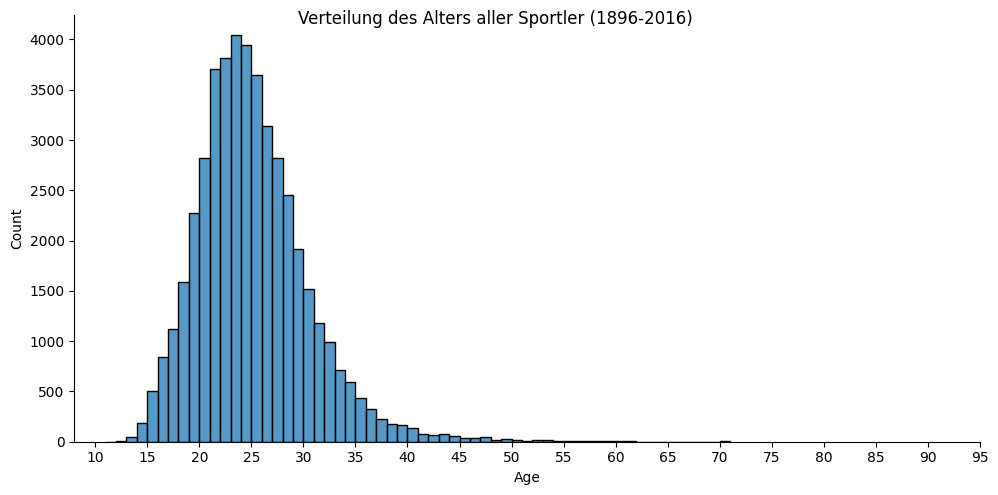

In [ ]:
sns.displot(
    data=df,
    x="Age",
    kind="hist",
    binwidth=1, # Wie viele Jahre in einem Bucket sind (1 Bucket pro Jahr)
    height=5,
    aspect=2 # Seitenverhältnis Breite zu Größe. Hier geben wir an: Breite = 2 * Höhe
    )

plt.suptitle("Verteilung des Alters aller Sportler (1896-2016)")
plt.xticks(list(range(10, 100, 5)))
plt.show();

Eine meiner Lieblingsfunktionen in Seaborn sind die `col` und `hue` parameter. Damit können ganz einfach Darstellungen nach einer kategorischen Variable gruppiert werden:  

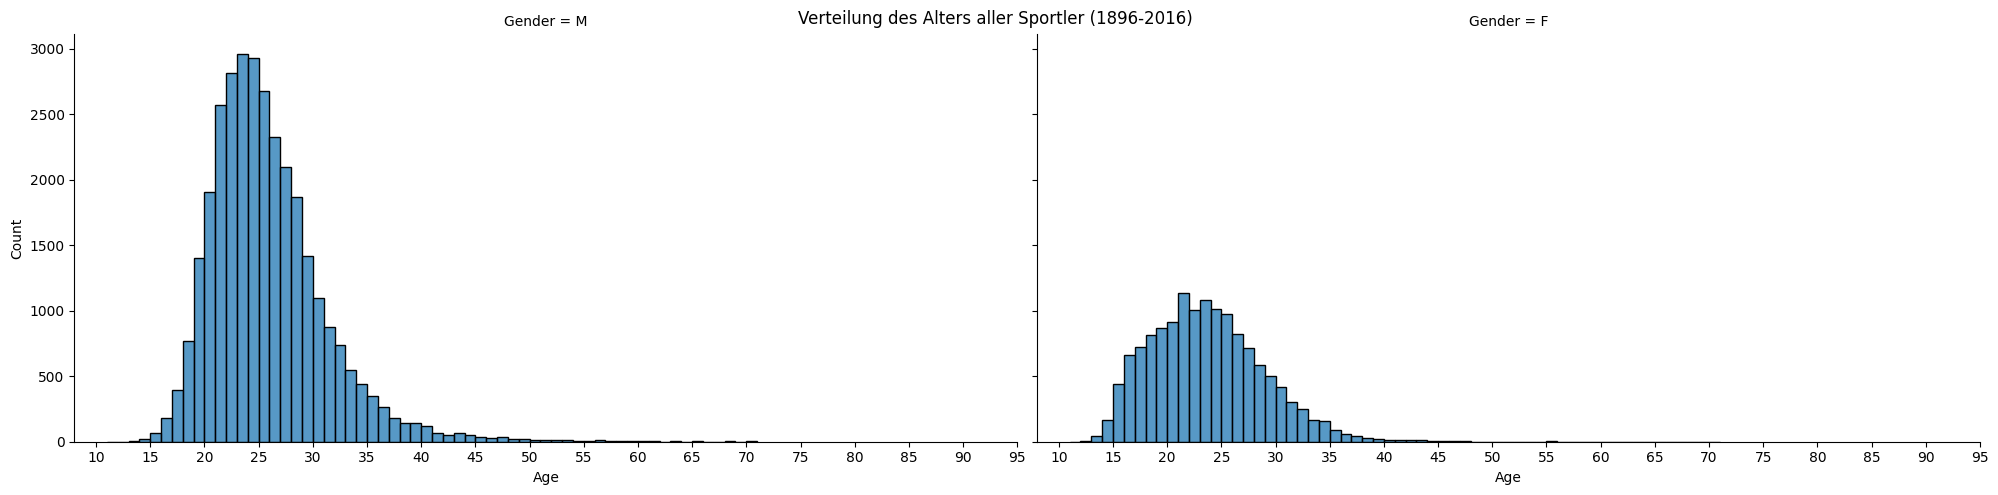

In [ ]:
sns.displot(
    data=df,
    x="Age",
    kind="hist",
    binwidth=1,
    height=5,
    aspect=2,
    col="Gender", # Wir gruppieren nach "Gender"
    )

plt.suptitle("Verteilung des Alters aller Sportler (1896-2016)")
plt.xticks(list(range(10, 100, 5)))
plt.show();

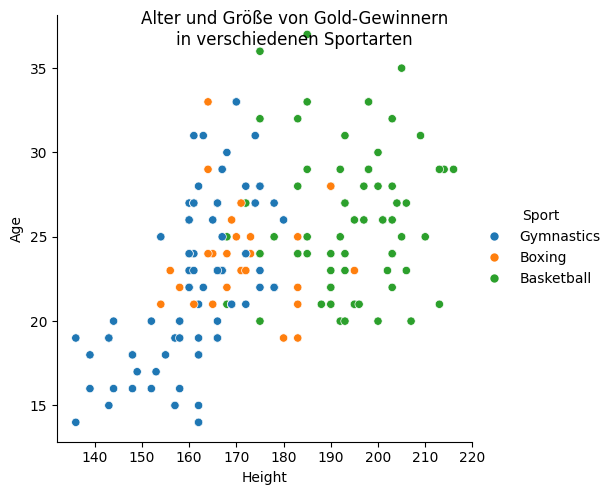

In [ ]:
sns.relplot(
    data=df[(df.Medal == "Gold") & (df.Sport.isin(["Gymnastics", "Boxing", "Basketball"]))],
    x="Height",
    y="Age",
    hue="Sport"
)

plt.suptitle("""Alter und Größe von Gold-Gewinnern
in verschiedenen Sportarten""")

plt.show()

**Versuche selbst einen Seaborn Plot zu erstellen**

In [ ]:
# Dein Code hier

### Matplotlib
`matplotlib` ist die grundlegendste aller Python Visualisierungs-Bibliotheken. Das heißt, dass viele der Funktionen die wie bislang kennengelernt haben (z.B. `.plot()` aus `pandas` oder `sns.displot()`) bauen auf `matplotlib` auf.

Oftmals sind diese *Abstraktionen* etwas einfacher zu verwenden, ermöglichen aber nicht die volle Flexibilität von `matplotlib`. Daher schauen wir uns diese grundlegende Bibliothek hier etwas genauer an.

In [1]:
import matplotlib.pyplot as plt

#### `Fig` und `Ax`
Matplotlib ist eine sehr flexible Bibliothek zum Erstellen von Plots in Python. Sie erlaubt es uns, sehr spezifische Anpassungen vorzunehmen, was für kompliziertere Visualisierungen notwendig ist. Im Kern von Matplotlib gibt es zwei zentrale Konzepte:

**Figure** (`fig`): Das ist das "Canvas", also die gesamte Figur, auf der alles gezeichnet wird. Man kann sich das wie ein leeres Blatt Papier vorstellen, auf dem mehrere Diagramme platziert werden können.

**Axes** (`ax`): Dies sind die tatsächlichen Bereiche innerhalb der Figure, in denen Daten dargestellt werden. Jede "Axes" ist im Grunde genommen ein Plot. Eine Figure kann eine oder mehrere Axes enthalten.

Schauen wir uns an, wie man eine Figure und eine Axes in Matplotlib erstellt. Der typische Weg, das zu tun, ist mit der Funktion `plt.subplots()`

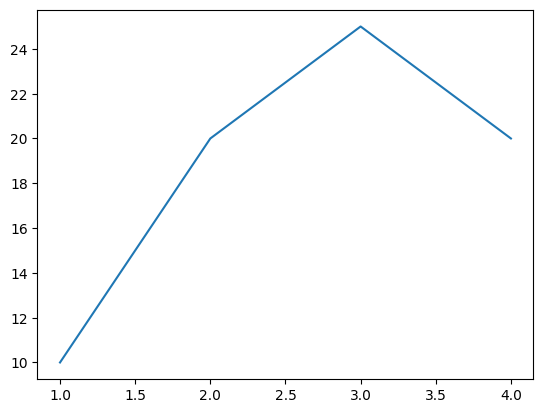

In [18]:
# Erstellen einer Figure und einer Axes
fig, ax = plt.subplots()

# Plotten von Daten in den Axes
# Hinweis: Die erste Liste bezeichnet die x-Koordinaten der Punkte und die zweite Liste die Y-Koordinaten
# Jeder Punkt ist also immer der n-te Wert aus der ersten Liste und der n-te Wert aus der zweiten, z.B. (3, 25)

ax.plot([1, 2, 3, 4], [10, 20, 25, 20])

# Anzeigen des Plots
plt.show()


Zur Erklärung
- `plt.subplots()`: Dies erstellt eine Figure und eine oder mehrere Axes. In unserem Fall gibt es eine einzelne Axes, und wir speichern sie in der Variable ax. fig ist die gesamte Figur (das große, weiße Rechteck), und ax ist das eigentliche Diagramm, das wir sehen.

- `ax.plot()`: Hier plotten wir die Daten auf den ax. Ihr könnt die Methode `ax.plot()` verwenden, um Linienplots zu zeichnen, ähnlich wie ihr es vielleicht schon mit `df.plot()` gemacht habt.

- `plt.show()`: Dies zeigt die Figur und alle darin enthaltenen Plots an.

Was macht dieses Konzept so stark? Wir können mehrere Plots (also mehrere Axes) in einer Figure erstellen. Zum Beispiel:

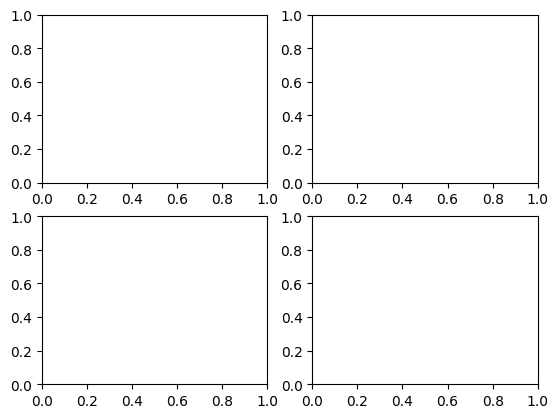

In [8]:
fig, axs = plt.subplots(2, 2)  # Erstellen von 2x2 Axes (also 4 Plots)

axs;

Noch sind die vier `axs` der `fig` leer. Aber wir können sie alle mit Daten füllen:

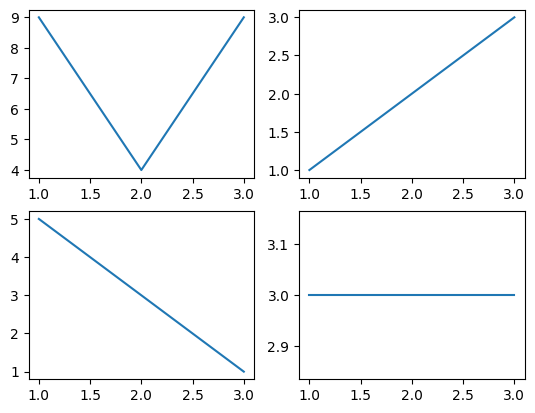

In [12]:
# Hinweis: axs[0, 0] bezeichnet welchen kleinen Graphen wir bemalen wollen
# Stell dir ein Koordinatensystem mit (0,0) oben links vor:
# (0, 1) geht einen Schritt in x-Richtung (also nach rechts);
# (1, 0) geht einen Schritt in y-Richtung (also nach unten)

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot([1, 2, 3], [9, 4, 9])
axs[0, 1].plot([1, 2, 3], [1, 2, 3])
axs[1, 0].plot([1, 2, 3], [5, 3, 1])
axs[1, 1].plot([1, 2, 3], [3, 3, 3])

plt.show()

**Versuche es selbst: Erstelle ein `fig` mit zwei `axs`. Auf jedem dieser `axs` kannst du ein eigenes Line Chart erstellen**

**Optional: Nutze dafür die Daten aus dem olympics dataframe**

In [30]:
# Dein Code hier

# Hinweis: Da du hier nur eine Spalte oder eine Zeile an axs erstellst, brauchst du sie nur mit axs[n] zu befüllen anstatt axs[n, m] wie oben

**Probiere nun statt `axs.plot()` die Funktionen `.scatter()`, `.bar()`, `.barh`, `.pie()`**

Siehe [hier](https://matplotlib.org/stable/api/axes_api.html#plotting) für Hilfe.

In [32]:
# Dein Code hier

#### Achsenbeschriftungen und Styling
Jetzt, da ihr wisst, wie `fig` (Figure) und `ax` (Axes) in Matplotlib funktionieren, wollen wir uns anschauen, wie man Plots anpassen kann. Das erlaubt uns, unsere Diagramme zu beschriften, zu organisieren und ihnen Kontext zu geben, damit sie klarer und informativer sind.



##### Titel & Achsenbeschriftungen

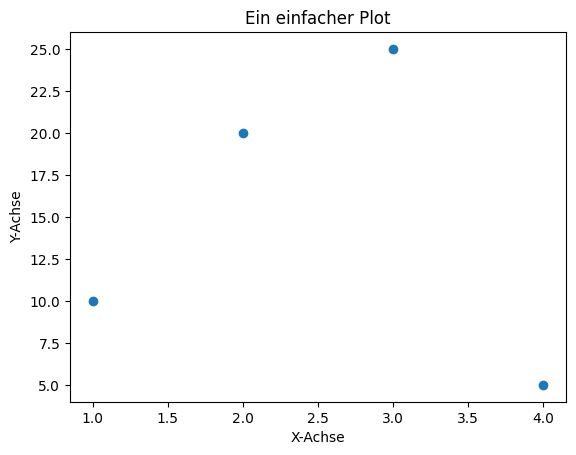

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots() # Das ist das gleiche wie plt.subplots(1,1)

# Daten plotten
ax.scatter([1, 2, 3, 4], [10, 20, 25, 5])

# Titel und Beschriftungen hinzufügen
ax.set_title("Ein einfacher Plot")
ax.set_xlabel("X-Achse")
ax.set_ylabel("Y-Achse")

plt.show()


##### Achsenanpassungen
Manchmal passen die Standardachsen nicht perfekt zu den Daten, die wir darstellen wollen. Matplotlib erlaubt uns, den Bereich der Achsen manuell anzupassen, um die Sichtbarkeit der Daten zu verbesserne. Ein häufiger Anwendungsfall ist, dass die y-Achse von 0 beginnen soll anstatt dem kleinsten Datenpunkt.

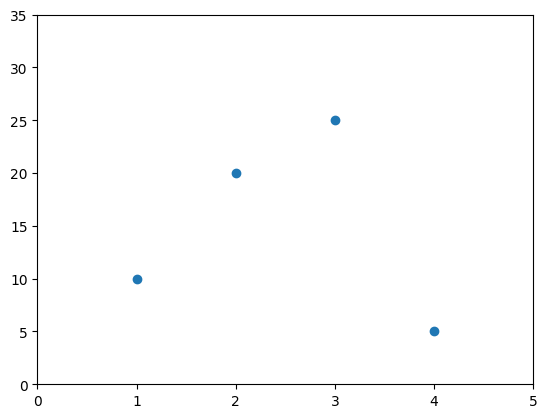

In [38]:
fig, ax = plt.subplots()

# Daten plotten
ax.scatter([1, 2, 3, 4], [10, 20, 25, 5])

# Achsenbereich anpassen
ax.set_xlim(0, 5)  # X-Achse reicht jetzt von 0 bis 5
ax.set_ylim(0, 35)  # Y-Achse reicht jetzt von 0 bis 35

plt.show()


##### Mehrere Linien in einem Plot und die Legende
Oft möchte man mehr als eine Datenreihe auf demselben Plot anzeigen. In diesem Fall ist es sinnvoll, eine Legende hinzuzufügen, um zu kennzeichnen, welche Linie welche Daten darstellt:

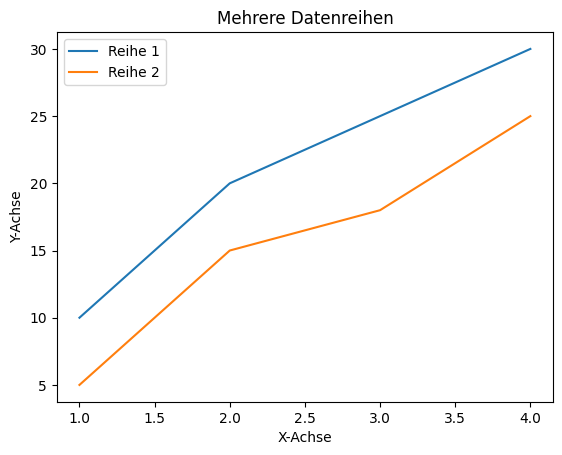

In [39]:
fig, ax = plt.subplots()

# Mehrere Datenreihen plotten
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], label='Reihe 1')
ax.plot([1, 2, 3, 4], [5, 15, 18, 25], label='Reihe 2')

# Beschriftungen hinzufügen
ax.set_title("Mehrere Datenreihen")
ax.set_xlabel("X-Achse")
ax.set_ylabel("Y-Achse")

# Legende hinzufügen
ax.legend()

plt.show()


##### Farben, Linienstile & Marker
Man kann die Darstellung von Linien in Matplotlib weiter anpassen, indem man Farben, Linienstile und Marker ändert

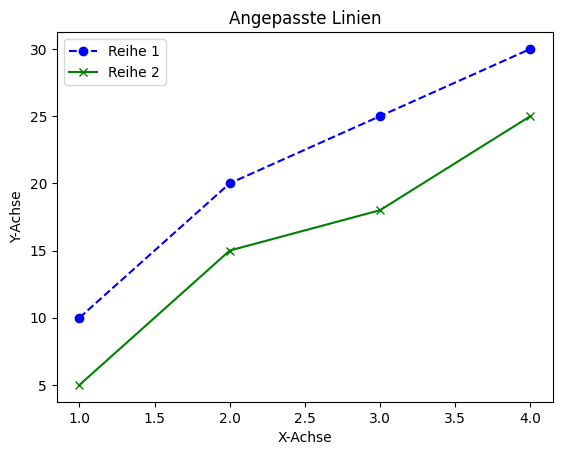

In [43]:
fig, ax = plt.subplots()

# Linien mit verschiedenen Stilen plotten
ax.plot([1, 2, 3, 4], [10, 20, 25, 30], color='blue', linestyle='--', marker='o', label='Reihe 1')
ax.plot([1, 2, 3, 4], [5, 15, 18, 25], color='green', linestyle='-', marker='x', label='Reihe 2')

# Legende, Titel und Beschriftungen
ax.set_title("Angepasste Linien")
ax.set_xlabel("X-Achse")
ax.set_ylabel("Y-Achse")
ax.legend()

plt.show()


## Spielwiese
**Überlege dir eine interessante Frage und wende die Techniken an, um eine Darstellung genau so zu gestalten, wie du sie haben möchtest**



In [44]:
# Dein Code hier